# HW 2

### Problem 1

In [232]:
from scipy.integrate import quad
import numpy as np
from matplotlib import pyplot as plt

alpha = -1.25
lowest_x = 1e-5
highest_x = 1e2

def phi(x):
    return x**alpha * np.exp(-x)

def get_P_light(x_min,x_max):
    def integrand(x):
        return x*phi(x)

    return quad(integrand, x_min, x_max,)[0] / quad(integrand, lowest_x, highest_x,)[0]

print(f"0 < x < .1 \t {get_P_light(lowest_x,.1):.2f}")
print(f".1 < x < 1 \t {get_P_light(.1,1):.2f}")
print(f"1 < x < 3  \t {get_P_light(1,3):.2f}")
print(f"3 < x \t\t {get_P_light(1,highest_x):.2f}")

0 < x < .1 	 0.19
.1 < x < 1 	 0.55
1 < x < 3  	 0.23
3 < x 		 0.26


Text(0.5, 0, 'x = $L/L_*$')

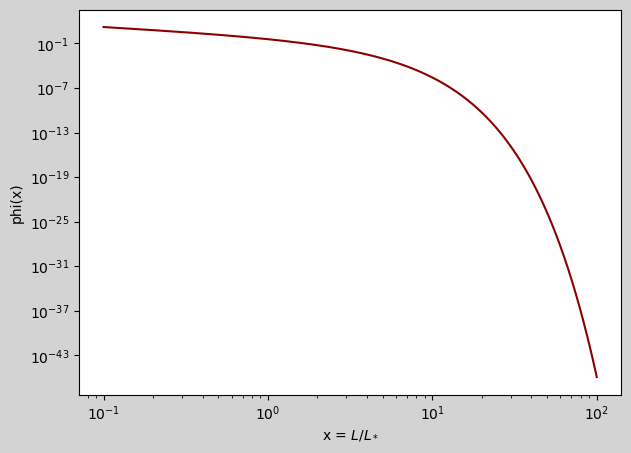

In [233]:
xs = np.logspace(-1,2,500)
fig,ax = plt.subplots(figsize=(7,5))
fig.set_facecolor("lightgray")
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(xs, [phi(x) for x in xs], color="darkred")
ax.set_ylabel("phi(x)")
ax.set_xlabel("x = $L/L_*$")

In [234]:
def get_P_galaxies(x_min,x_max):
    return quad(phi, x_min, x_max,)[0] / quad(phi, lowest_x, highest_x,)[0]

print(f"0 < x < .1 \t {get_P_galaxies(lowest_x,.1):.2f}")
print(f".1 < x < 1 \t {get_P_galaxies(.1,1):.2f}")
print(f"1 < x < 3  \t {get_P_galaxies(1,3):.2f}")
print(f"3 < x \t\t {get_P_galaxies(1,highest_x):.2f}")

0 < x < .1 	 0.96
.1 < x < 1 	 0.03
1 < x < 3  	 0.00
3 < x 		 0.00


### Problem 2

In [235]:
import pandas as pd
from scipy.interpolate import interp1d

filter_names = ['g', 'i', 'r', 'u', 'z']
filters = {}
for f in filter_names:
    filters[f] = pd.read_csv(f'hw2_data/sys_sdss_{f}.dat', sep =' ', names = ["lambd", "phi"])

def get_pivot(df):
    phi = interp1d(df["lambd"], df["phi"])
    lambd_min, lambd_max = df["lambd"][0], np.array(df["lambd"])[-1]
    # df contains lambda in angstroms and phi as fractional input
    def numerator_integrand(lambd):
        return lambd * phi(lambd)
    def denom_integrand(lambd):
        return phi(lambd) / lambd

    numerator = quad(numerator_integrand, lambd_min, lambd_max,)[0]
    denominator = quad(denom_integrand, lambd_min, lambd_max,)[0]

    return np.sqrt(numerator / denominator)

pivots = {}
for f in filters:
    pivots[f] = float(get_pivot(filters[f]))
    print(f"{f} : {pivots[f]:.2f} A")

g : 4677.45 A
i : 7495.70 A
r : 6168.24 A
u : 3516.13 A
z : 8969.63 A


/var/folders/vw/19_m05lx64s_j4tk4nfr1zyc0000gn/T/ipykernel_29220/671642788.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  numerator = quad(numerator_integrand, lambd_min, lambd_max,)[0]
/var/folders/vw/19_m05lx64s_j4tk4nfr1zyc0000gn/T/ipykernel_29220/671642788.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  pro

In [236]:
def get_mean_f_lambd(filter_df, gxy_df):
    lambd_min = np.max([filter_df["lambd"][0], gxy_df["lambd"][0]])
    lambd_max = np.min([np.array(filter_df["lambd"])[-1], np.array(gxy_df["lambd"])[-1]])

    phi = interp1d(filter_df["lambd"], filter_df["phi"], bounds_error=False, fill_value=0.0)
    f_lambd = interp1d(gxy_df["lambd"], gxy_df["f_lambd"], bounds_error=False, fill_value=0.0)

    def numerator_integrand(lambd):
        return lambd * f_lambd(lambd) * phi(lambd)
    def denom_integrand(lambd):
        return lambd * phi(lambd)

    numerator = quad(numerator_integrand, lambd_min, lambd_max,)[0]
    denominator = quad(denom_integrand, lambd_min, lambd_max,)[0]

    return numerator/denominator

#### galaxy 1 (Ep)

In [237]:
ep_gxy = pd.read_csv(f'hw2_data/DESI_Ep.dat', sep =' ', names = ["lambd", "f_lambd", "f_error", "model"])
ep_gxy["f_lambd"] = ep_gxy["f_lambd"] * 1e-17 # fluxs given in units of 1e-17 flux units

mean_f_lambds_ep = {}
for f in filters:
    mean_f_lambds_ep[f] = get_mean_f_lambd(filters[f], ep_gxy)
    print(f"{f} : {mean_f_lambds_ep[f]:.2e} erg s^-1 cm^-2 A^-1")
mean_f_lambds_ep

g : 1.21e-15 erg s^-1 cm^-2 A^-1
i : 1.76e-15 erg s^-1 cm^-2 A^-1
r : 1.69e-15 erg s^-1 cm^-2 A^-1
u : 4.44e-16 erg s^-1 cm^-2 A^-1
z : 1.80e-15 erg s^-1 cm^-2 A^-1


/var/folders/vw/19_m05lx64s_j4tk4nfr1zyc0000gn/T/ipykernel_29220/538492516.py:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  denominator = quad(denom_integrand, lambd_min, lambd_max,)[0]


{'g': 1.2079853609187354e-15,
 'i': 1.7563046730219326e-15,
 'r': 1.6889359665545574e-15,
 'u': 4.4394952596063545e-16,
 'z': 1.8006591925761145e-15}

In [238]:
c = 3e10 # cm/s
f_nu_0 = 3.631e-20 # erg / cm^2

ms = {}
for f in filters:
    mean_f_nu = (pivots[f]**2 * mean_f_lambds_ep[f] / c) * 1e-8  # had to convert an angstrom unit to cm
    ms[f] = -2.5 * np.log10(mean_f_nu / f_nu_0)
    print(f"{f} : {ms[f]:.2f}")
ms

g : 16.54
i : 15.11
r : 15.57
u : 18.24
z : 14.69


{'g': np.float64(16.537667009577234),
 'i': np.float64(15.107306924647713),
 'r': np.float64(15.57303084035076),
 'u': np.float64(18.24420934232699),
 'z': np.float64(14.690416338009042)}

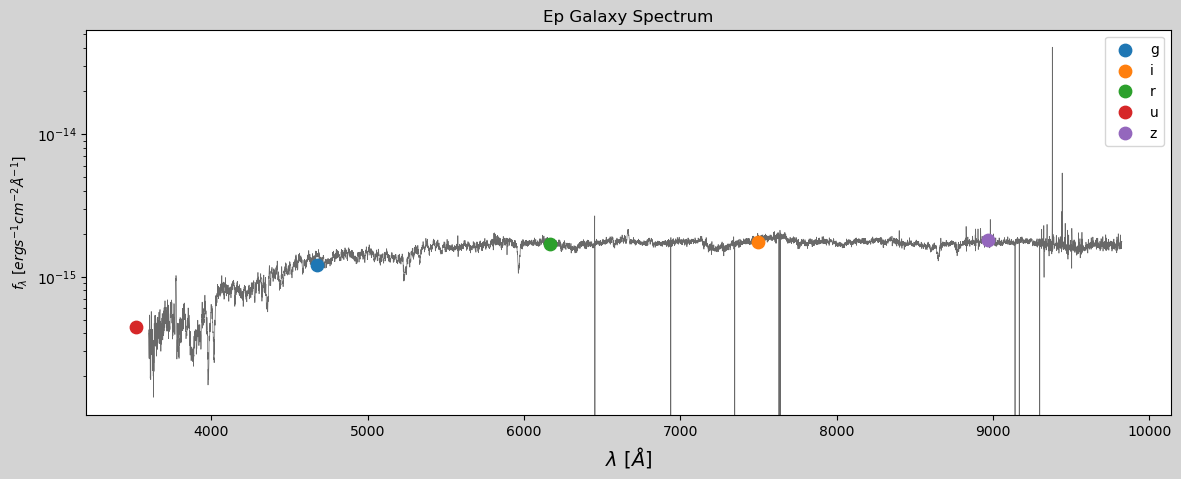

In [239]:
fig,ax = plt.subplots(figsize=(14,5))
fig.set_facecolor('lightgray')
ax.set_yscale('log')
ax.set_xlabel("$\lambda$ [$\AA$]", fontsize=14)
ax.set_ylabel("$f_\lambda$ [$erg s^{-1} cm^{-2} \AA^{-1}$]")
ax.set_title("Ep Galaxy Spectrum")

for f in filters:
    ax.scatter(pivots[f], mean_f_lambds_ep[f], label = f, zorder=3, s = 80)

ax.plot(ep_gxy["lambd"], ep_gxy["f_lambd"], linewidth=.5, color ='dimgray')

ax.legend()

#### galaxy 2 (SF)

In [240]:
sf_gxy = pd.read_csv(f'hw2_data/DESI_SF.dat', sep =' ', names = ["lambd", "f_lambd", "f_error", "model"])
sf_gxy["f_lambd"] = sf_gxy["f_lambd"] * 1e-17

mean_f_lambds_sf = {}
for f in filters:
    mean_f_lambds_sf[f] = get_mean_f_lambd(filters[f], sf_gxy)
    print(f"{f} : {mean_f_lambds_sf[f]:.2e} erg s^-1 cm^-2 A^-1")

mean_f_lambds_sf

g : 4.50e-16 erg s^-1 cm^-2 A^-1
i : 1.64e-16 erg s^-1 cm^-2 A^-1


/var/folders/vw/19_m05lx64s_j4tk4nfr1zyc0000gn/T/ipykernel_29220/538492516.py:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  denominator = quad(denom_integrand, lambd_min, lambd_max,)[0]


r : 2.84e-16 erg s^-1 cm^-2 A^-1
u : 6.82e-16 erg s^-1 cm^-2 A^-1
z : 1.08e-16 erg s^-1 cm^-2 A^-1


{'g': 4.498657407371556e-16,
 'i': 1.6428219250099274e-16,
 'r': 2.8443821354574086e-16,
 'u': 6.818214592826305e-16,
 'z': 1.0842998190436884e-16}

In [241]:
c = 3e10 # cm/s
f_nu_0 = 3.631e-20 # erg / cm^2

ms = {}
for f in filters:
    mean_f_nu = (pivots[f]**2 * mean_f_lambds_sf[f] / c) * 1e-8  # had to convert an angstrom unit to cm
    ms[f] = -2.5 * np.log10(mean_f_nu / f_nu_0)
    print(f"{f} : {ms[f]:.2f}")
ms

g : 17.61
i : 17.68
r : 17.51
u : 17.78
z : 17.74


{'g': np.float64(17.610113885320757),
 'i': np.float64(17.67983034108004),
 'r': np.float64(17.507093945194367),
 'u': np.float64(17.7783666691653),
 'z': np.float64(17.741121680987963)}

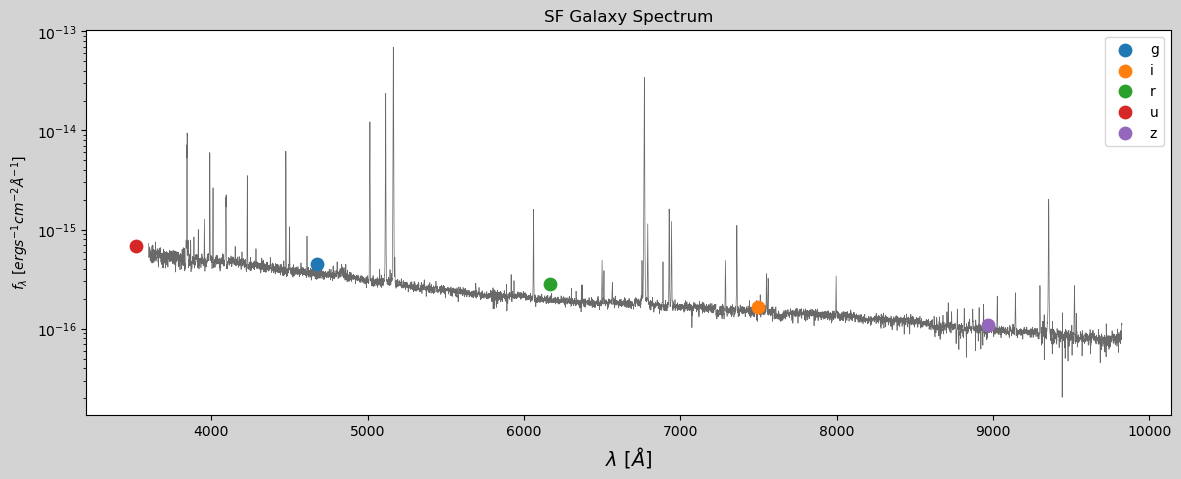

In [242]:
fig,ax = plt.subplots(figsize=(14,5))
fig.set_facecolor('lightgray')
ax.set_yscale('log')
ax.set_xlabel("$\lambda$ [$\AA$]", fontsize=14)
ax.set_ylabel("$f_\lambda$ [$erg s^{-1} cm^{-2} \AA^{-1}$]")
ax.set_title("SF Galaxy Spectrum")

for f in filters:
    ax.scatter(pivots[f], mean_f_lambds_sf[f], label = f, zorder=3, s = 80)

ax.plot(sf_gxy["lambd"], sf_gxy["f_lambd"], linewidth=.5, color ='dimgray')

ax.legend()

### Problem 3

In [260]:
def get_m(filter_df, gxy_df, z_gxy, z):
    # make copies of the dataframes so you dont edit the og
    filter_df = filter_df.copy()
    gxy_df = gxy_df.copy()

    # adjust gxy_df to match this redshift
    gxy_df["lambd_rest"] = gxy_df["lambd"] / (1+z_gxy) # de-redshift the lambdas
    gxy_df["f_lambd_rest"] = gxy_df["f_lambd"] * (1+z_gxy) * 1e17 # de-redshift the f_lambda 
    # (^ use model to avoid integration/interpolation issues)
    gxy_df["lambd"] = gxy_df["lambd_rest"] * (1+z) # re-redshift (to z) the lambds 
    gxy_df["f_lambd"] = gxy_df["f_lambd_rest"] / (1+z) # re-redshift (to z) the f_lambds

    # #adjust filter_df to match this redshift
    # filter_df["lambd_rest"] = filter_df["lambd"] / (1+z) # de-redshift the lambdas
    # filter_df["lambd"] = filter_df["lambd"] * (1+z) # re-redshift (to z) the lambdas

    # get new pivot 
    pivot = get_pivot(filter_df)

    # get new mean_f_lambd
    mean_f_lambd = get_mean_f_lambd(filter_df, gxy_df)

    #get nu mean_f_nu
    c = 3e10 # cm/s
    f_nu_0 = 3.631e-20 # erg / cm^2
    mean_f_nu = (pivot**2 * mean_f_lambd / c) * 1e-8  # had to convert an angstrom unit to cm

    #get new apparent magnitude
    m = -2.5 * np.log10(mean_f_nu / f_nu_0)

    return m

In [261]:
def get_ks(gxy_df, z_gxy, zs):
    # temp_filter_i = filters['i'].copy()
    # temp_filter_i["lambd"] /= (1+zs)

    m_i_at_z = np.array([get_m(filters['i'], gxy_df, z_gxy, z) for z in zs])
    m_g_at_0 = get_m(filters['g'], gxy_df, z_gxy, 0)
    first_term = np.array([-2.5*np.log10(1+z) for z in zs])

    ks = first_term + m_i_at_z - m_g_at_0

    return ks

z_ep = .012
z_sf = .031

zs = np.linspace(0,1,500)
ks_ep = get_ks(ep_gxy, z_ep, zs)
ks_sf = get_ks(sf_gxy, z_sf, zs)

/var/folders/vw/19_m05lx64s_j4tk4nfr1zyc0000gn/T/ipykernel_29220/671642788.py:18: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  numerator = quad(numerator_integrand, lambd_min, lambd_max,)[0]
/var/folders/vw/19_m05lx64s_j4tk4nfr1zyc0000gn/T/ipykernel_29220/671642788.py:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  pro

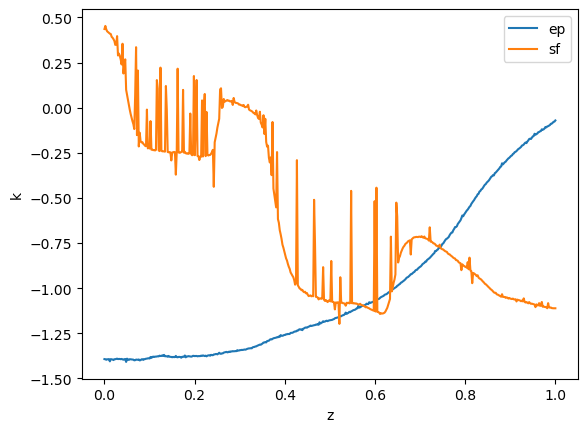

In [262]:
plt.plot(zs, ks_ep, label='ep')
plt.plot(zs, ks_sf, label='sf')
plt.xlabel("z")
plt.ylabel("k")
plt.legend()

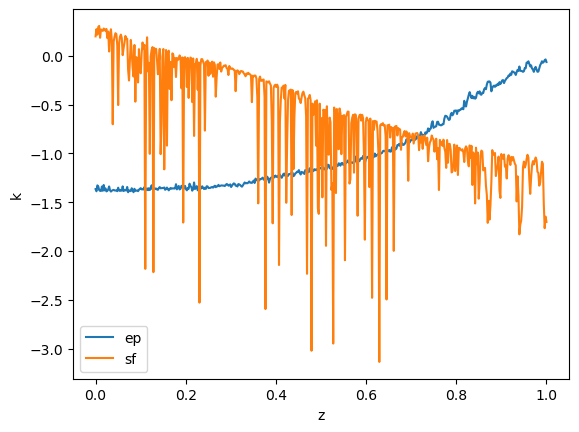

In [259]:
plt.plot(zs, ks_ep, label='ep')
plt.plot(zs, ks_sf, label='sf')
plt.xlabel("z")
plt.ylabel("k")
plt.legend()

(0.0, 500.0)

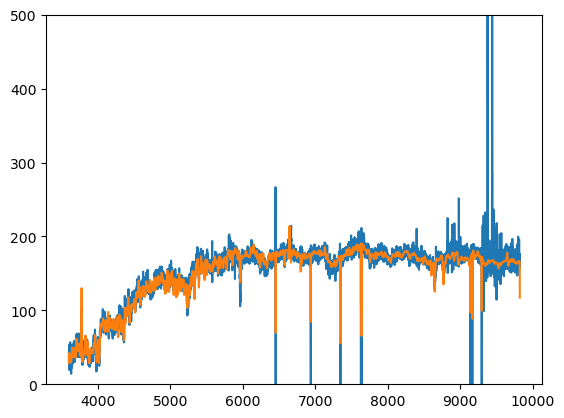

In [246]:
plt.plot(ep_gxy['lambd'], ep_gxy['f_lambd']*1e17)
plt.plot(ep_gxy['lambd'], ep_gxy['model'])
# plt.xlim((4000,9000))
plt.ylim((0,500))

(0.0, 100.0)

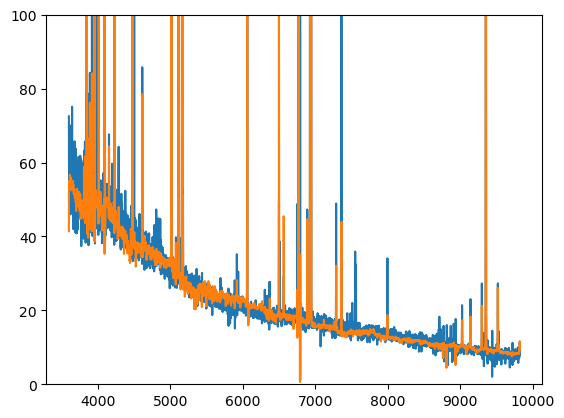

In [264]:
plt.plot(sf_gxy['lambd'], sf_gxy['f_lambd']*1e17)
plt.plot(sf_gxy['lambd'], sf_gxy['model'])
# plt.xlim((4000,9000))
plt.ylim((0,100))